In [1]:
%cd ~/protein-transfer

/home/francesca/protein-transfer


In [2]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import annotations

import ast

import numpy as np
import pandas as pd


In [13]:
result_df = pd.read_csv("results/summary/all_results.csv")

# Convert the string of lists to NumPy arrays
result_df["value"] = result_df["value"].apply(ast.literal_eval).apply(np.array)

result_df

,arch,task,model,ablation,metric,value
0,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,train_loss,"[9.59526940116963, 6.894266263718891, 6.377686..."
1,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,val_loss,"[11.18654191999164, 8.622644328345816, 8.33617..."
2,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,test_loss,"[13.582533778622887, 53.712009437112215, 74.04..."
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962..."
4,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,test_performance_2,"[0.19544242309285326, 0.3282696048440418, 0.31..."
...,...,...,...,...,...,...
1629,esm,annotation_scl_balanced,onehot,onehot,train_loss,[0.3524752729817441]
1630,esm,annotation_scl_balanced,onehot,onehot,val_loss,[1.373852210385459]
1631,esm,annotation_scl_balanced,onehot,onehot,test_loss,[2.0159953236579895]
1632,esm,annotation_scl_balanced,onehot,onehot,test_performance_2,[0.37402597402597404]


In [5]:
# goal to create a plot with x performance for diff btw layer 0 to x
# y axis with performance for layer x to end

layer_cut = 4

result_df.iloc[0]["value"][0], result_df.iloc[0]["value"][layer_cut], result_df.iloc[0]["value"][-1]

(9.59526940116963, 6.238232287532919, 6.520748210024759)

In [6]:
def delta_layer(layer_cut: int, value_array: np.array) -> np.array:
    """
    A function return the difference between a given layer performance
    to 0th and the last layer

    Args:
    - layer_cut: int, the layer whose performance will be compared
    - value_array: np.array, the array of all layer performances

    Returns:
    - np.arrary, the performance difference between
        [layer_cut - layer0, final_layer - layer_cut]
    """

    last_layer_numb = len(value_array)

    assert (
        0 < layer_cut < last_layer_numb
    ), f"{layer_cut} not in between 0 and {last_layer_numb}"

    layer_perf = value_array[layer_cut]

    return np.array([layer_perf - value_array[0], value_array[-1] - layer_perf])

In [7]:
delta_layer(layer_cut=4, value_array=result_df.iloc[0]["value"])

array([-3.35703711,  0.28251592])

In [20]:
df_perf_1 = result_df[(result_df["metric"] == "test_performance_1") & (result_df["model"] != "onehot")].copy()
df_perf_1

,arch,task,model,ablation,metric,value
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962..."
8,carp,proeng_aav_one_vs_many_mean,carp_76M,emb,test_performance_1,"[0.9703413636783854, 0.9633589617754629, 0.962..."
13,carp,proeng_aav_one_vs_many_mean,carp_600k,emb,test_performance_1,"[0.9698271299324172, 0.96692411292824, 0.96943..."
18,carp,proeng_aav_one_vs_many_mean,carp_38M,emb,test_performance_1,"[0.969236054842432, 0.9626272649406287, 0.9625..."
23,carp,proeng_aav_two_vs_many_mean,carp_76M,emb,test_performance_1,"[0.9714573396664609, 0.9727033667459596, 0.978..."
...,...,...,...,...,...,...
1568,esm,annotation_scl_balanced_mean,esm1b_t33_650M_UR50S,rand,test_performance_1,"[0.7202398891736108, 0.7586025980453048, 0.779..."
1605,esm,annotation_scl_balanced_mean,esm1_t6_43M_UR50S,stat,test_performance_1,"[0.6821707705747047, 0.7605586599656295, 0.782..."
1610,esm,annotation_scl_balanced_mean,esm1_t12_85M_UR50S,stat,test_performance_1,"[0.677306587623228, 0.7539519597951471, 0.7782..."
1615,esm,annotation_scl_balanced_mean,esm1_t34_670M_UR50S,stat,test_performance_1,"[0.7023044022670766, 0.7230077030393312, 0.739..."


In [22]:

# Apply the function and generate two new columns
df_perf_1["x-0"], df_perf_1["f-x"] = zip(*df_perf_1.apply(lambda row: delta_layer(layer_cut=4, value_array=row["value"]),axis=1))
df_perf_1


,arch,task,model,ablation,metric,value,x-0,f-x
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962...",-0.008670,0.006923
8,carp,proeng_aav_one_vs_many_mean,carp_76M,emb,test_performance_1,"[0.9703413636783854, 0.9633589617754629, 0.962...",-0.008372,0.006079
13,carp,proeng_aav_one_vs_many_mean,carp_600k,emb,test_performance_1,"[0.9698271299324172, 0.96692411292824, 0.96943...",-0.004231,0.006643
18,carp,proeng_aav_one_vs_many_mean,carp_38M,emb,test_performance_1,"[0.969236054842432, 0.9626272649406287, 0.9625...",-0.007654,0.004897
23,carp,proeng_aav_two_vs_many_mean,carp_76M,emb,test_performance_1,"[0.9714573396664609, 0.9727033667459596, 0.978...",0.013738,-0.000133
...,...,...,...,...,...,...,...,...
1568,esm,annotation_scl_balanced_mean,esm1b_t33_650M_UR50S,rand,test_performance_1,"[0.7202398891736108, 0.7586025980453048, 0.779...",0.085061,0.061070
1605,esm,annotation_scl_balanced_mean,esm1_t6_43M_UR50S,stat,test_performance_1,"[0.6821707705747047, 0.7605586599656295, 0.782...",0.134783,0.011432
1610,esm,annotation_scl_balanced_mean,esm1_t12_85M_UR50S,stat,test_performance_1,"[0.677306587623228, 0.7539519597951471, 0.7782...",0.113783,0.058106
1615,esm,annotation_scl_balanced_mean,esm1_t34_670M_UR50S,stat,test_performance_1,"[0.7023044022670766, 0.7230077030393312, 0.739...",0.075594,0.105145


In [23]:
import matplotlib.pyplot as plt

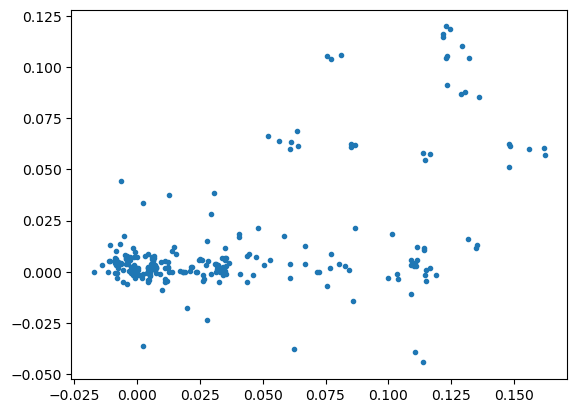

In [25]:
plt.plot(df_perf_1["x-0"], df_perf_1["f-x"], ".")